# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



- K-Means Clustering adalah algoritma untuk membagi beberapa pengamatan menjadi k kelompok sedemikian hingga tiap pengamatan termasuk ke dalam kelompok dengan rata-rata terdekat.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [21]:
#code here
df['Umur'].fillna(method='ffill', inplace=True)
df['Skor Belanja (1-100)'].fillna(method='ffill', inplace=True)

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.61200,64.736000,50.244000
std,72.312977,14.21145,25.112324,28.455286
min,1.000000,18.00000,15.000000,3.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,35.00000,70.000000,50.000000
75%,187.750000,48.00000,78.750000,74.000000
max,250.000000,120.00000,137.000000,150.000000


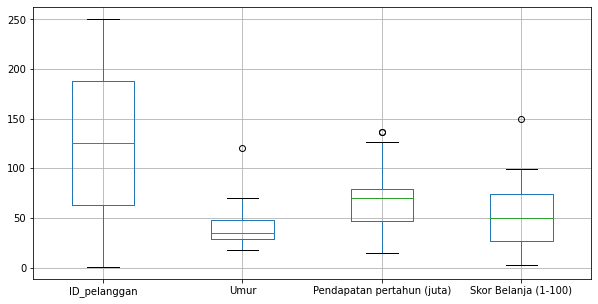

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [30]:
Q1 = (df[['Umur','Pendapatan pertahun (juta)','Skor Belanja (1-100)']]).quantile(0.25)
Q3 = (df[['Umur','Pendapatan pertahun (juta)','Skor Belanja (1-100)']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

Nilai Maximum dari masing-masing Variable adalah: 
Umur                           76.500
Pendapatan pertahun (juta)    126.375
Skor Belanja (1-100)          144.500
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Umur                           0.500
Pendapatan pertahun (juta)    -0.625
Skor Belanja (1-100)         -43.500
dtype: float64


In [31]:
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['Umur','Pendapatan pertahun (juta)','Skor Belanja (1-100)']].describe())


Persebaran data setelah ditangani Outlier: 
             Umur  Pendapatan pertahun (juta)  Skor Belanja (1-100)
count  250.000000                  250.000000            250.000000
mean    38.438000                   64.651000             50.222000
std     13.457249                   24.883611             28.379876
min     18.000000                   15.000000              3.000000
25%     29.000000                   47.000000             27.000000
50%     35.000000                   70.000000             50.000000
75%     48.000000                   78.750000             74.000000
max     76.500000                  126.375000            144.500000


C:\Users\Vulcan\AppData\Local\Temp/ipykernel_8144/3110897870.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df > maximum)
C:\Users\Vulcan\AppData\Local\Temp/ipykernel_8144/3110897870.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df < minimum)


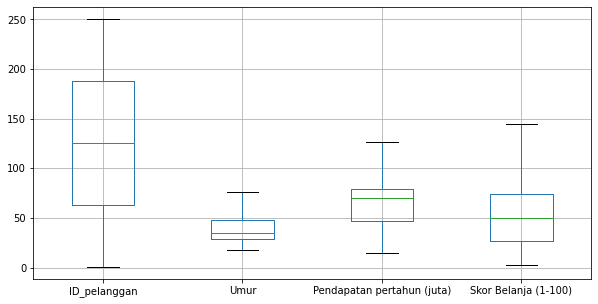

In [32]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [33]:
df.columns

Index(['ID_pelanggan', 'Jenis Kelamin', 'Umur', 'Pendapatan pertahun (juta)',
       'Skor Belanja (1-100)'],
      dtype='object')

In [35]:
encode = {
    'Jenis Kelamin': { 'Laki-laki' : 1, 'Perempuan' : 2}
}
df = df.replace(encode)
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,1,19.0,15.0,39.0
1,2,1,21.0,15.0,81.0
2,3,2,20.0,16.0,6.0
3,4,2,23.0,16.0,77.0
4,5,2,31.0,17.0,40.0


In [36]:
from sklearn.preprocessing import StandardScaler  
#Define StandardScaler as scaler  
scaler = StandardScaler()  
#list all the feature that need to be scaled  
scaling_column = ['ID_pelanggan', 'Jenis Kelamin', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']
#Apply fit_transfrom to scale selected feature  
df[scaling_column] = scaler.fit_transform(df[scaling_column])
#Cheking min and max value of the scaling_column
print(df[scaling_column].describe().T[['min','max']])

                                 min       max
ID_pelanggan               -1.725136  1.725136
Jenis Kelamin              -1.101086  0.908195
Umur                       -1.521782  2.834038
Pendapatan pertahun (juta) -1.999332  2.485484
Skor Belanja (1-100)       -1.667263  3.328666


In [53]:
from sklearn.cluster import KMeans
X = df[['Umur','Skor Belanja (1-100)']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 3, random_state = 48)  
labels = cluster_model.fit_predict(X)

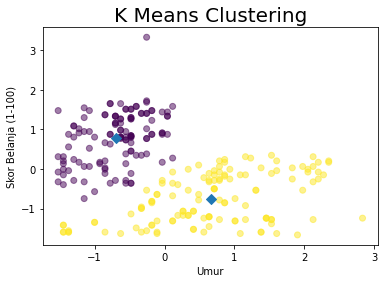

In [49]:
X = X.values
xs = X[:,0]
ys = X[:,1]
plt.scatter(xs,ys,c=labels, alpha=0.5)
centroids = cluster_model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

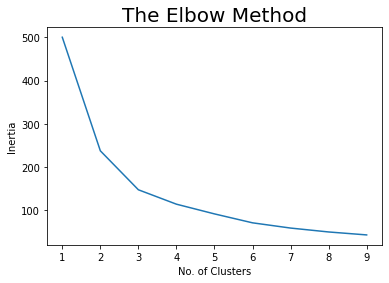

In [51]:
inertia = []
for k in range(1, 10):
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    cluster_model.fit(X)
    inertia_value = cluster_model.inertia_
    inertia.append(inertia_value)
    
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

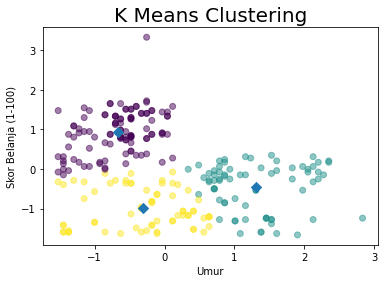

In [54]:
X = X.values
xs = X[:,0]
ys = X[:,1]
plt.scatter(xs,ys,c=labels, alpha=0.5)
centroids = cluster_model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

- Semakin tinggi umur seseorang, skor belanja tidak terlalu tinggi karena membeli yang dibutuhkan saja
- Remaja umur belasan cenderung memiliki skor belanja yang tinggi